### Final annotation of Epithelial cells from large intestine (first trimester)


Preprocessing:
- epithelial cells from main object subsetted, then subsetted cells from large intesine, and further subsetted only cells from first trimester patients
- performed scvi batch correction to prepare objects

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_header()

scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.3.5 scikit-learn==0.24.1 statsmodels==0.13.5 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [5]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/post_scvi20221124/LI_FT_epi.hvg5000_noCC.scvi_output.with_annotv2.22021124.h5ad')

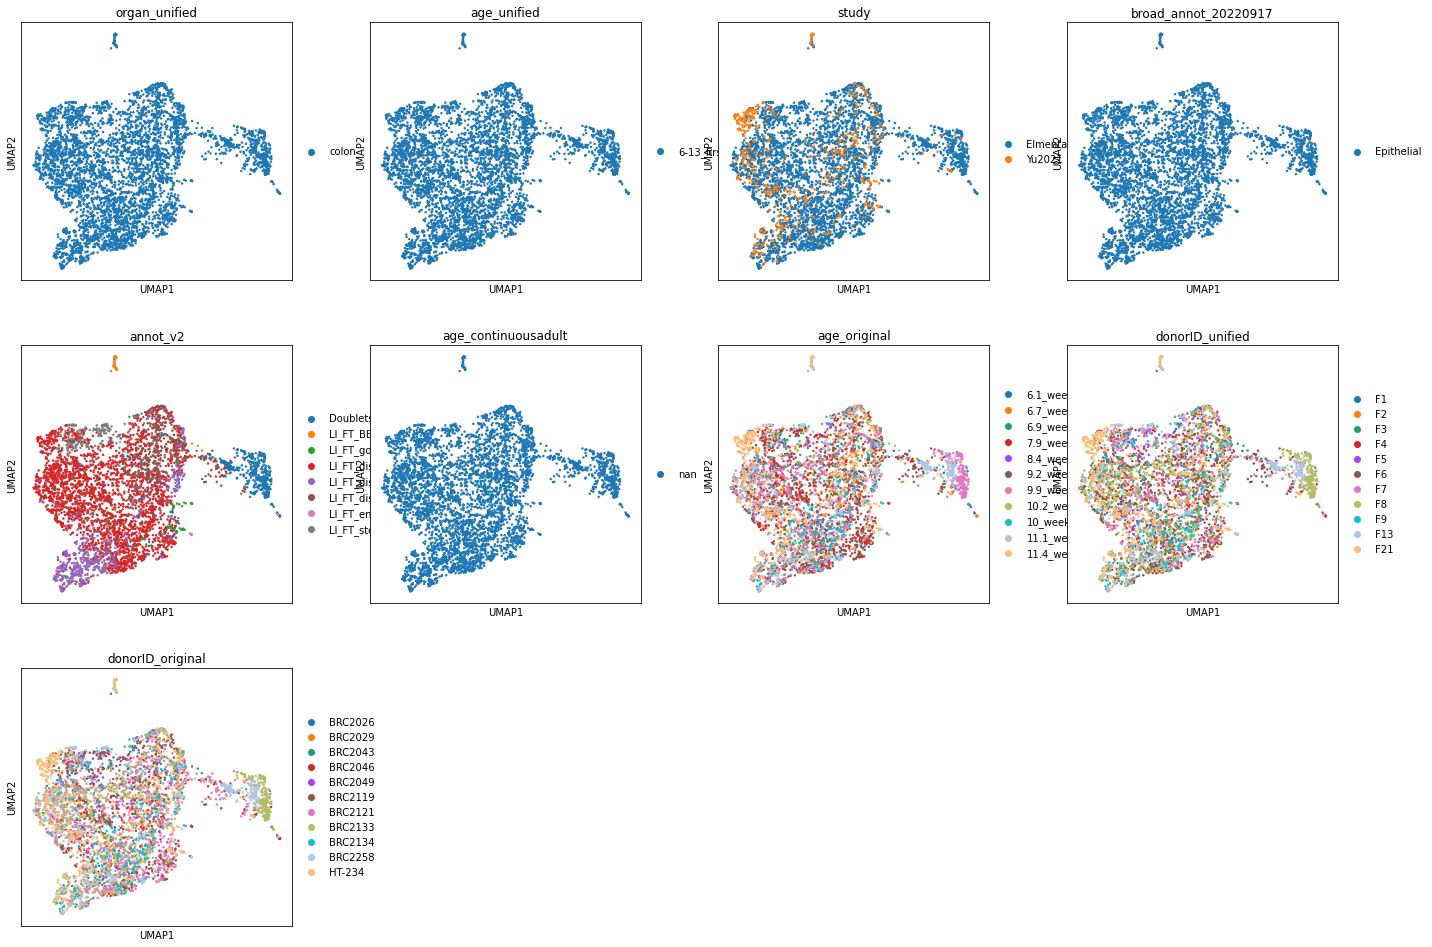

In [6]:
plt.rcParams['figure.figsize'] = [5,5]
sc.pl.umap(adata, color=['organ_unified', 'age_unified','study','broad_annot_20220917','annot_v2','age_continuousadult','age_original','donorID_unified','donorID_original'],cmap='OrRd')

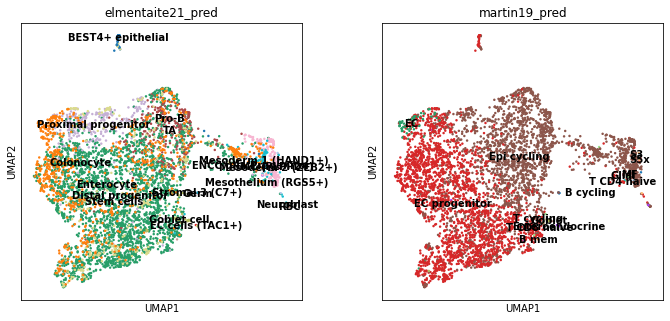

In [7]:
sc.pl.umap(adata, color=['elmentaite21_pred','martin19_pred'],legend_loc='on data')

In [8]:
adata.X.max()

3961.0

In [9]:
#save raw counts in layers
adata.layers['counts'] = adata.X
#normalise and transform
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [10]:
adata.X.max()

8.372243

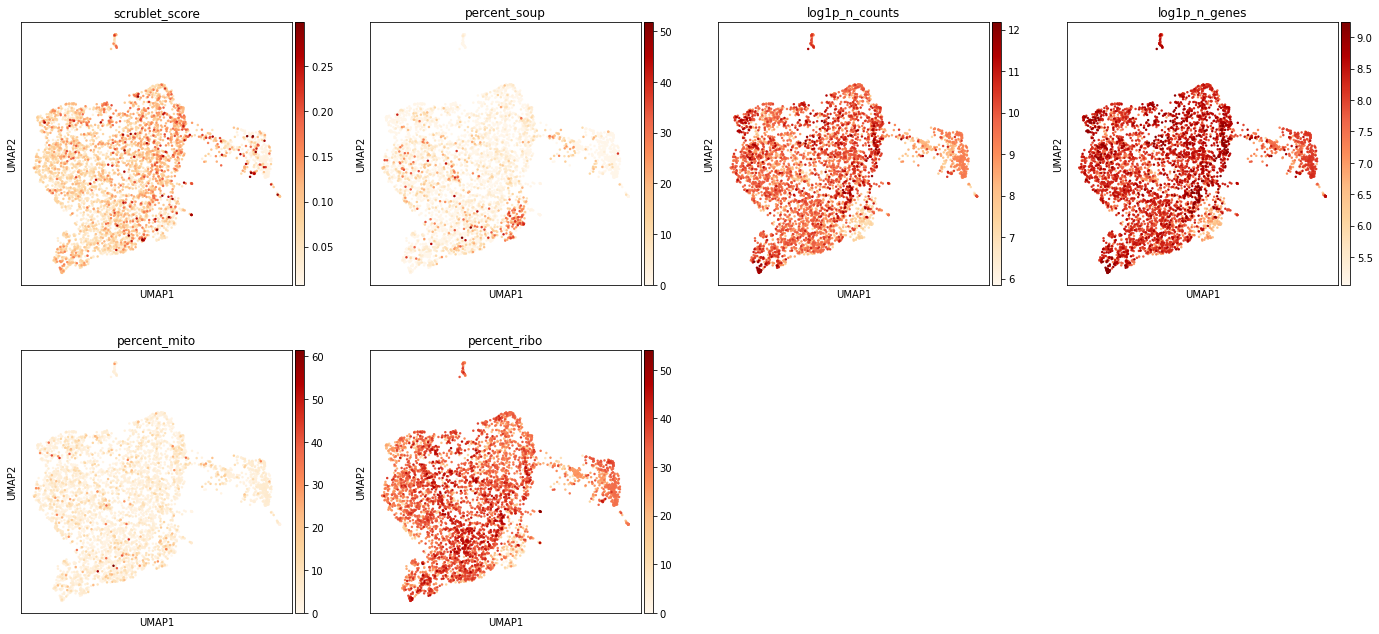

In [11]:
#plot some basic QC
sc.pl.umap(adata, color = ['scrublet_score','percent_soup','log1p_n_counts','log1p_n_genes','percent_mito','percent_ribo'],cmap='OrRd')

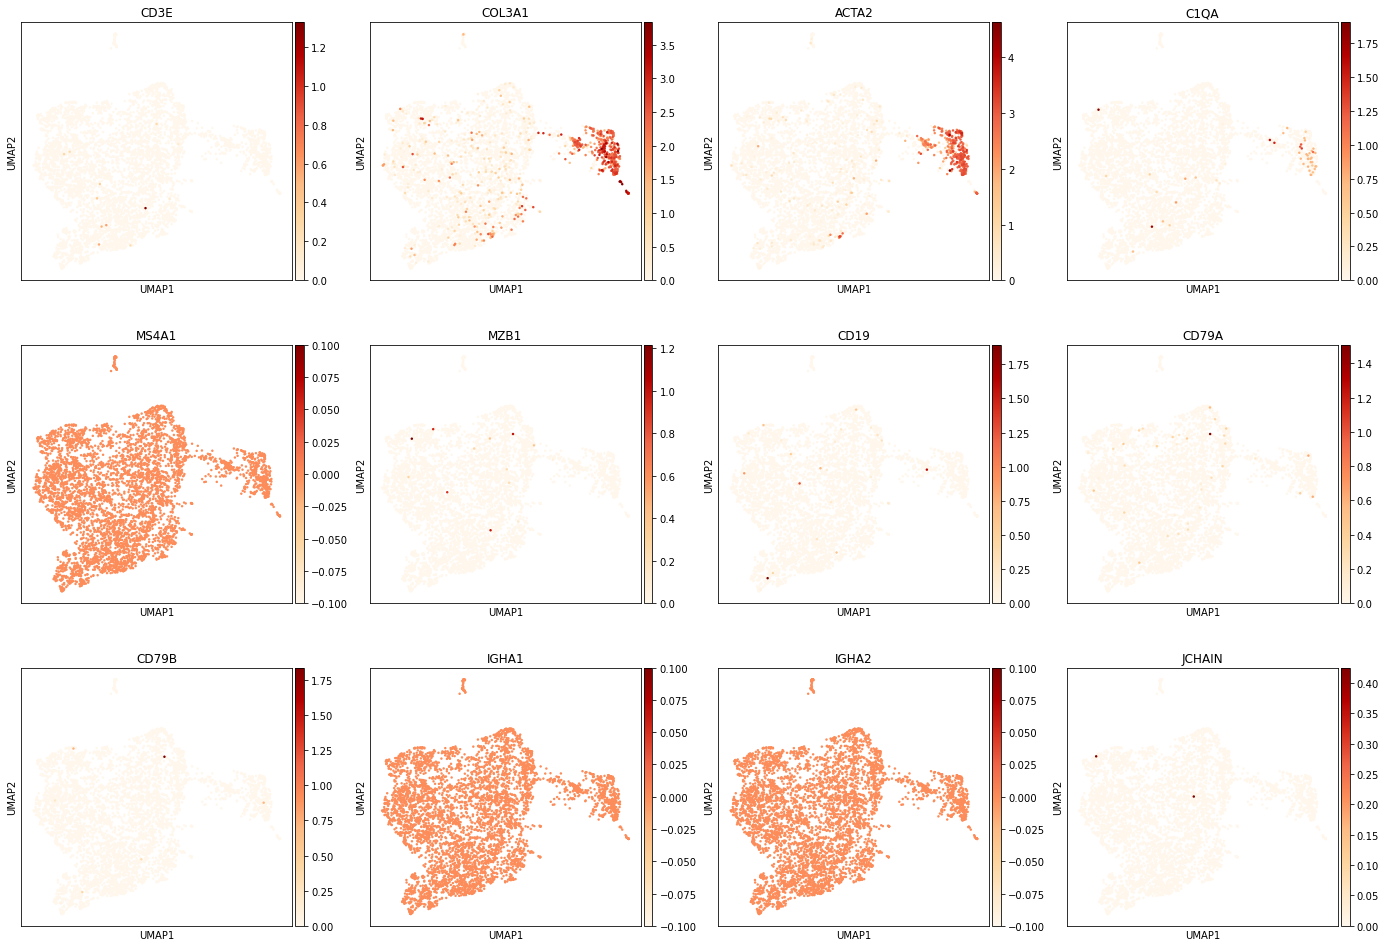

In [12]:
#plot doublet genes
sc.pl.umap(adata, color = ['CD3E','COL3A1','ACTA2','C1QA','MS4A1','MZB1','CD19','CD79A','CD79B','IGHA1','IGHA2','JCHAIN'],cmap='OrRd')

In [14]:
#score cell cycle genes
cell_cycle_genes = ['MCM5',
'PCNA',
 'TYMS',
 'FEN1',
 'MCM2',
 'MCM4',
 'RRM1',
 'UNG',
 'GINS2',
 'MCM6',
 'CDCA7',
 'DTL',
 'PRIM1',
 'UHRF1',
 'MLF1IP',
 'HELLS',
 'RFC2',
 'RPA2',
 'NASP',
 'RAD51AP1',
 'GMNN',
 'WDR76',
 'SLBP',
 'CCNE2',
 'UBR7',
 'POLD3',
 'MSH2',
 'ATAD2',
 'RAD51',
 'RRM2',
 'CDC45',
 'CDC6',
 'EXO1',
 'TIPIN',
 'DSCC1',
 'BLM',
 'CASP8AP2',
 'USP1',
 'CLSPN',
 'POLA1',
 'CHAF1B',
 'BRIP1',
 'E2F8',
 'HMGB2',
 'CDK1',
 'NUSAP1',
 'UBE2C',
 'BIRC5',
 'TPX2',
 'TOP2A',
 'NDC80',
 'CKS2',
 'NUF2',
 'CKS1B',
 'MKI67',
 'TMPO',
 'CENPF',
 'TACC3',
 'FAM64A',
 'SMC4',
 'CCNB2',
 'CKAP2L',
 'CKAP2',
 'AURKB',
 'BUB1',
 'KIF11',
 'ANP32E',
 'TUBB4B',
 'GTSE1',
 'KIF20B',
 'HJURP',
 'CDCA3',
 'HN1',
 'CDC20',
 'TTK',
 'CDC25C',
 'KIF2C',
 'RANGAP1',
 'NCAPD2',
 'DLGAP5',
 'CDCA2',
 'CDCA8',
 'ECT2',
 'KIF23',
 'HMMR',
 'AURKA',
 'PSRC1',
 'ANLN',
 'LBR',
 'CKAP5',
 'CENPE',
 'CTCF',
 'NEK2',
 'G2E3',
 'GAS2L3',
 'CBX5',
 'CENPA']

In [15]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
adata = adata[adata.obs.G2M_score.sort_values(ascending=True).index].copy()

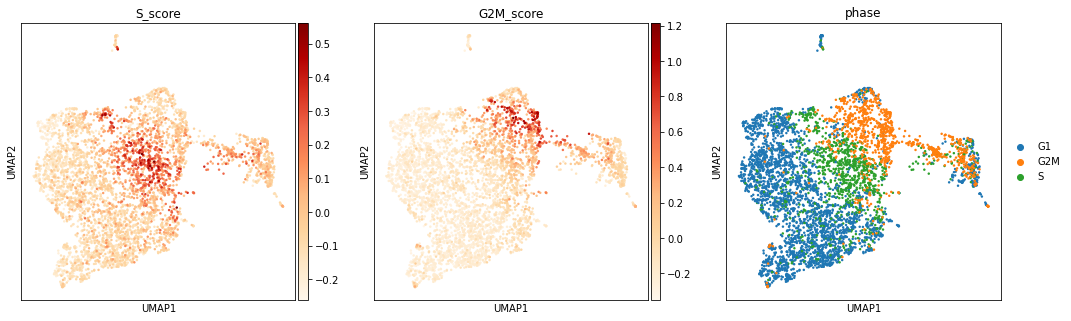

In [16]:
sc.pl.umap(adata,color=['S_score', 'G2M_score', 'phase'],cmap='OrRd')

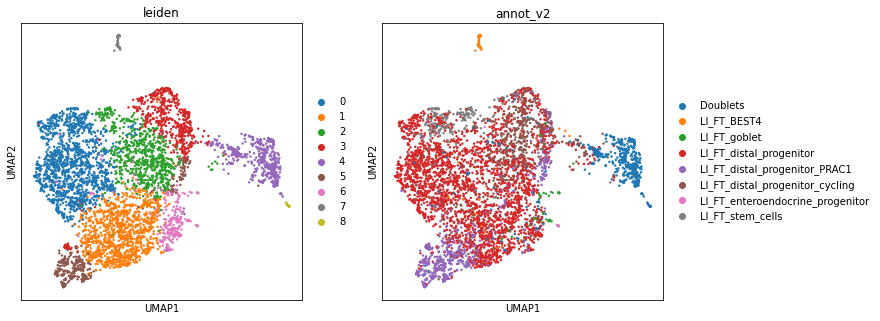

In [17]:
sc.tl.leiden(adata, resolution = 0.5, neighbors_key="neighbors_scvi")
sc.pl.umap(adata,color=['leiden','annot_v2'])

In [18]:
import sys
sys.path.append("/home/jovyan/ao15/Megagut/")
from re5_combine import *

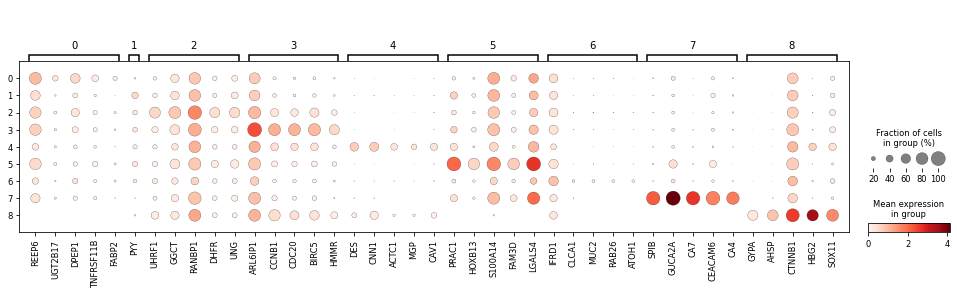

In [19]:
adata.raw = adata.copy()
mkst = calc_marker_stats(adata, groupby="leiden")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(adata, groupby='leiden', mks=mks)

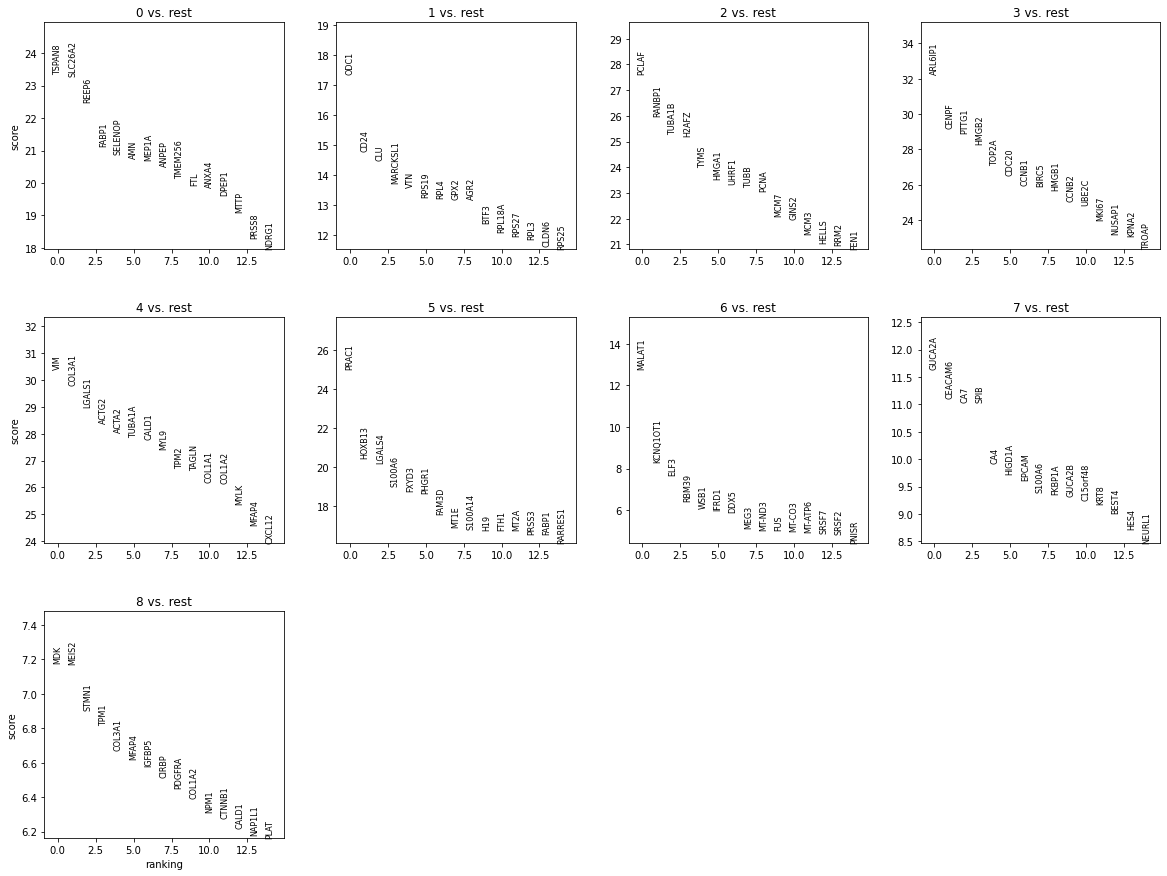

In [20]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

In [21]:
pd.set_option('display.max_columns', 100)
pd.crosstab(adata.obs.annot_v2,adata.obs.leiden)

leiden                               0    1    2    3    4    5    6   7   8
annot_v2                                                                    
Doublets                            19   17   18    8  455    4   21   1  18
LI_FT_BEST4                          4    8    0    3    0    0    1  45   0
LI_FT_goblet                         0    7    2    4    0    1   36   0   0
LI_FT_distal_progenitor           1157  800  380  207   36   31  157   1   0
LI_FT_distal_progenitor_PRAC1       27  254   39   92    2  285   10   0   0
LI_FT_distal_progenitor_cycling     30   56  219  211   22    2    8   0   0
LI_FT_enteroendocrine_progenitor     0    0    1    0    0    0    8   0   2
LI_FT_stem_cells                   135    7   78   22    2    0    3   0   0

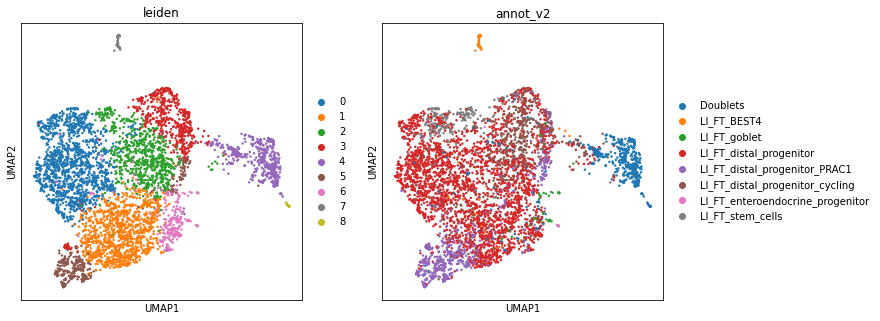

In [22]:
sc.pl.umap(adata,color=['leiden','annot_v2'])

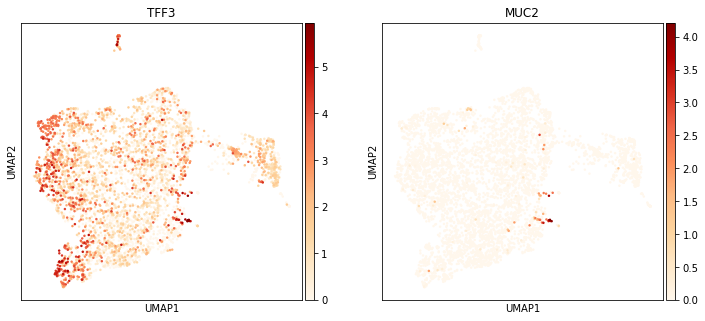

In [24]:
sc.pl.umap(adata,color=['TFF3','MUC2'],cmap='OrRd')

In [25]:
new_cluster_names = [
    'LI_FT_distal_progenitor','LI_FT_distal_progenitor', #0,1
    'LI_FT_cycling_S','LI_FT_cycling_G2M', #2,3
    'Doublets','LI_FT_distal_progenitor_PRAC1', #4,5
    'LI_FT_distal_progenitor','LI_FT_BEST4', #6,7 
   'Doublets'#8

]

conv = {str(i):name for i,name in enumerate(new_cluster_names)}

adata.obs['annot_v3'] = [conv[x] for x in adata.obs['leiden']]

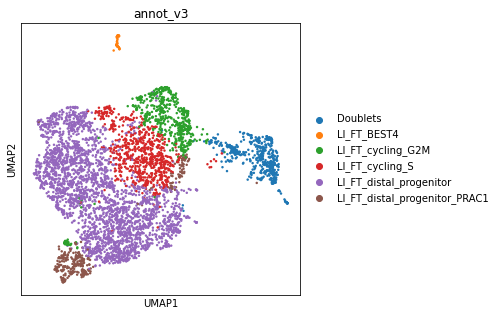

In [26]:
sc.pl.umap(adata,color='annot_v3')

In [27]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/LI_FT_epi.hvg5000_noRPL.scvi_output.annotv3.20221201.h5ad')

In [28]:
annot = adata.obs.loc[:,['annot_v2','annot_v3']]

In [29]:
annot.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/LI_FT_epi_annot_v3_draft.csv')

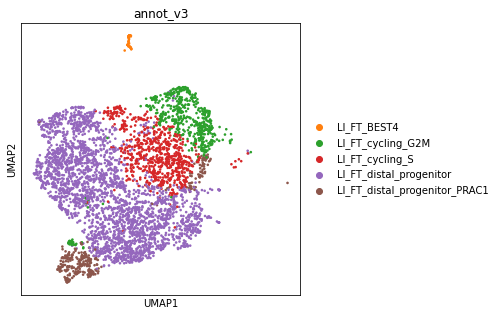

In [30]:
adata_nodoublets = adata[~adata.obs.annot_v3.isin(['Doublets'])].copy()
sc.pl.umap(adata_nodoublets,color='annot_v3')

In [31]:
adata_nodoublets.X.max()

8.372243

In [32]:
#recover raw
adata_nodoublets.X = adata_nodoublets.layers['counts']

In [33]:
adata_nodoublets.X.max()

3961.0

In [34]:
adata_nodoublets.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/LI_FT_epi.raw.annotv3.nodoublets.20221201.h5ad')

In [2]:
#make plots for paper figures

In [4]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/LI_FT_epi.hvg5000_noRPL.scvi_output.annotv3.20221201.h5ad')

In [5]:
annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/healthy_annotations_level1to3_20230127.csv',index_col=0)

In [6]:
adata.obs['fine_annot'] = annot.level_3_annot

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


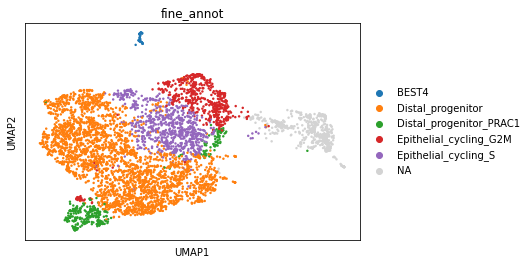

In [7]:
sc.pl.umap(adata,color='fine_annot')

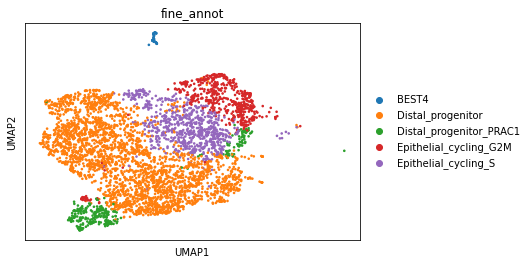

In [8]:
adata = adata[~adata.obs.annot_v3.isin(['Doublets'])].copy()
sc.pl.umap(adata,color='fine_annot')

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


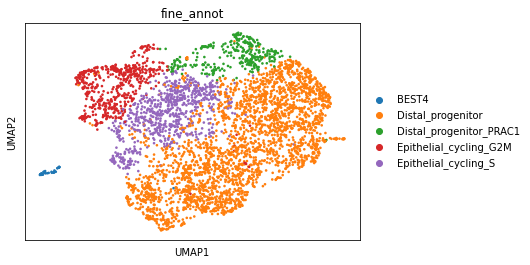

In [9]:
sc.pp.neighbors(
            adata,
            use_rep="X_scvi",
            n_pcs=adata.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(adata, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(adata, color='fine_annot')

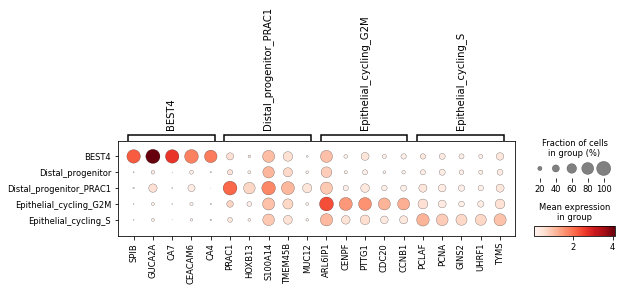

In [11]:
import sys
sys.path.append("/home/jovyan/ao15/Megagut/")
from re5_combine import *
adata.raw = adata.copy()
mkst = calc_marker_stats(adata, groupby="fine_annot")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(adata, groupby='fine_annot', mks=mks)

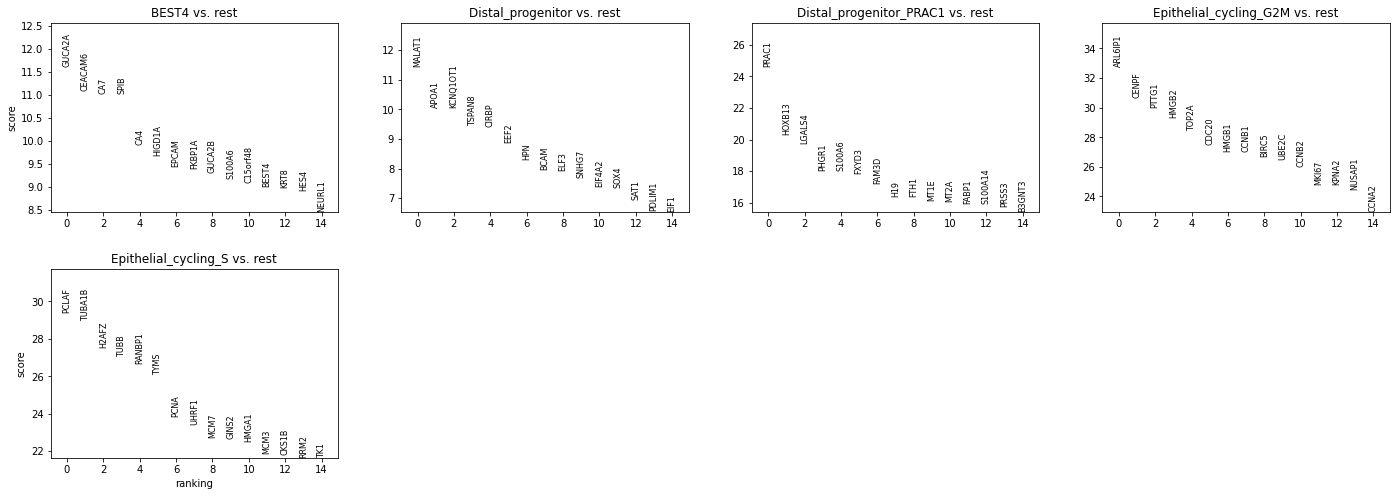

In [12]:
adata.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(adata, 'fine_annot', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

In [14]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['figure.figsize'] = [5,5]
sc.set_figure_params(dpi=300,dpi_save=600)

In [24]:
marker_genes_dict = { 'BEST4 Enterocyte':['BEST4','CA7','OTOP2','SPIB'],
                     'Distal_progenitor':['APOA1','BCAM','KCNQ1OT1'],
                     'Distal_progenitor_PRAC1':['PRAC1','HOXB13'],
                      'Cycling markers':['TOP2A','CCNB1','MKI67','PCLAF','GINS2','PCNA'],
                    
                     }

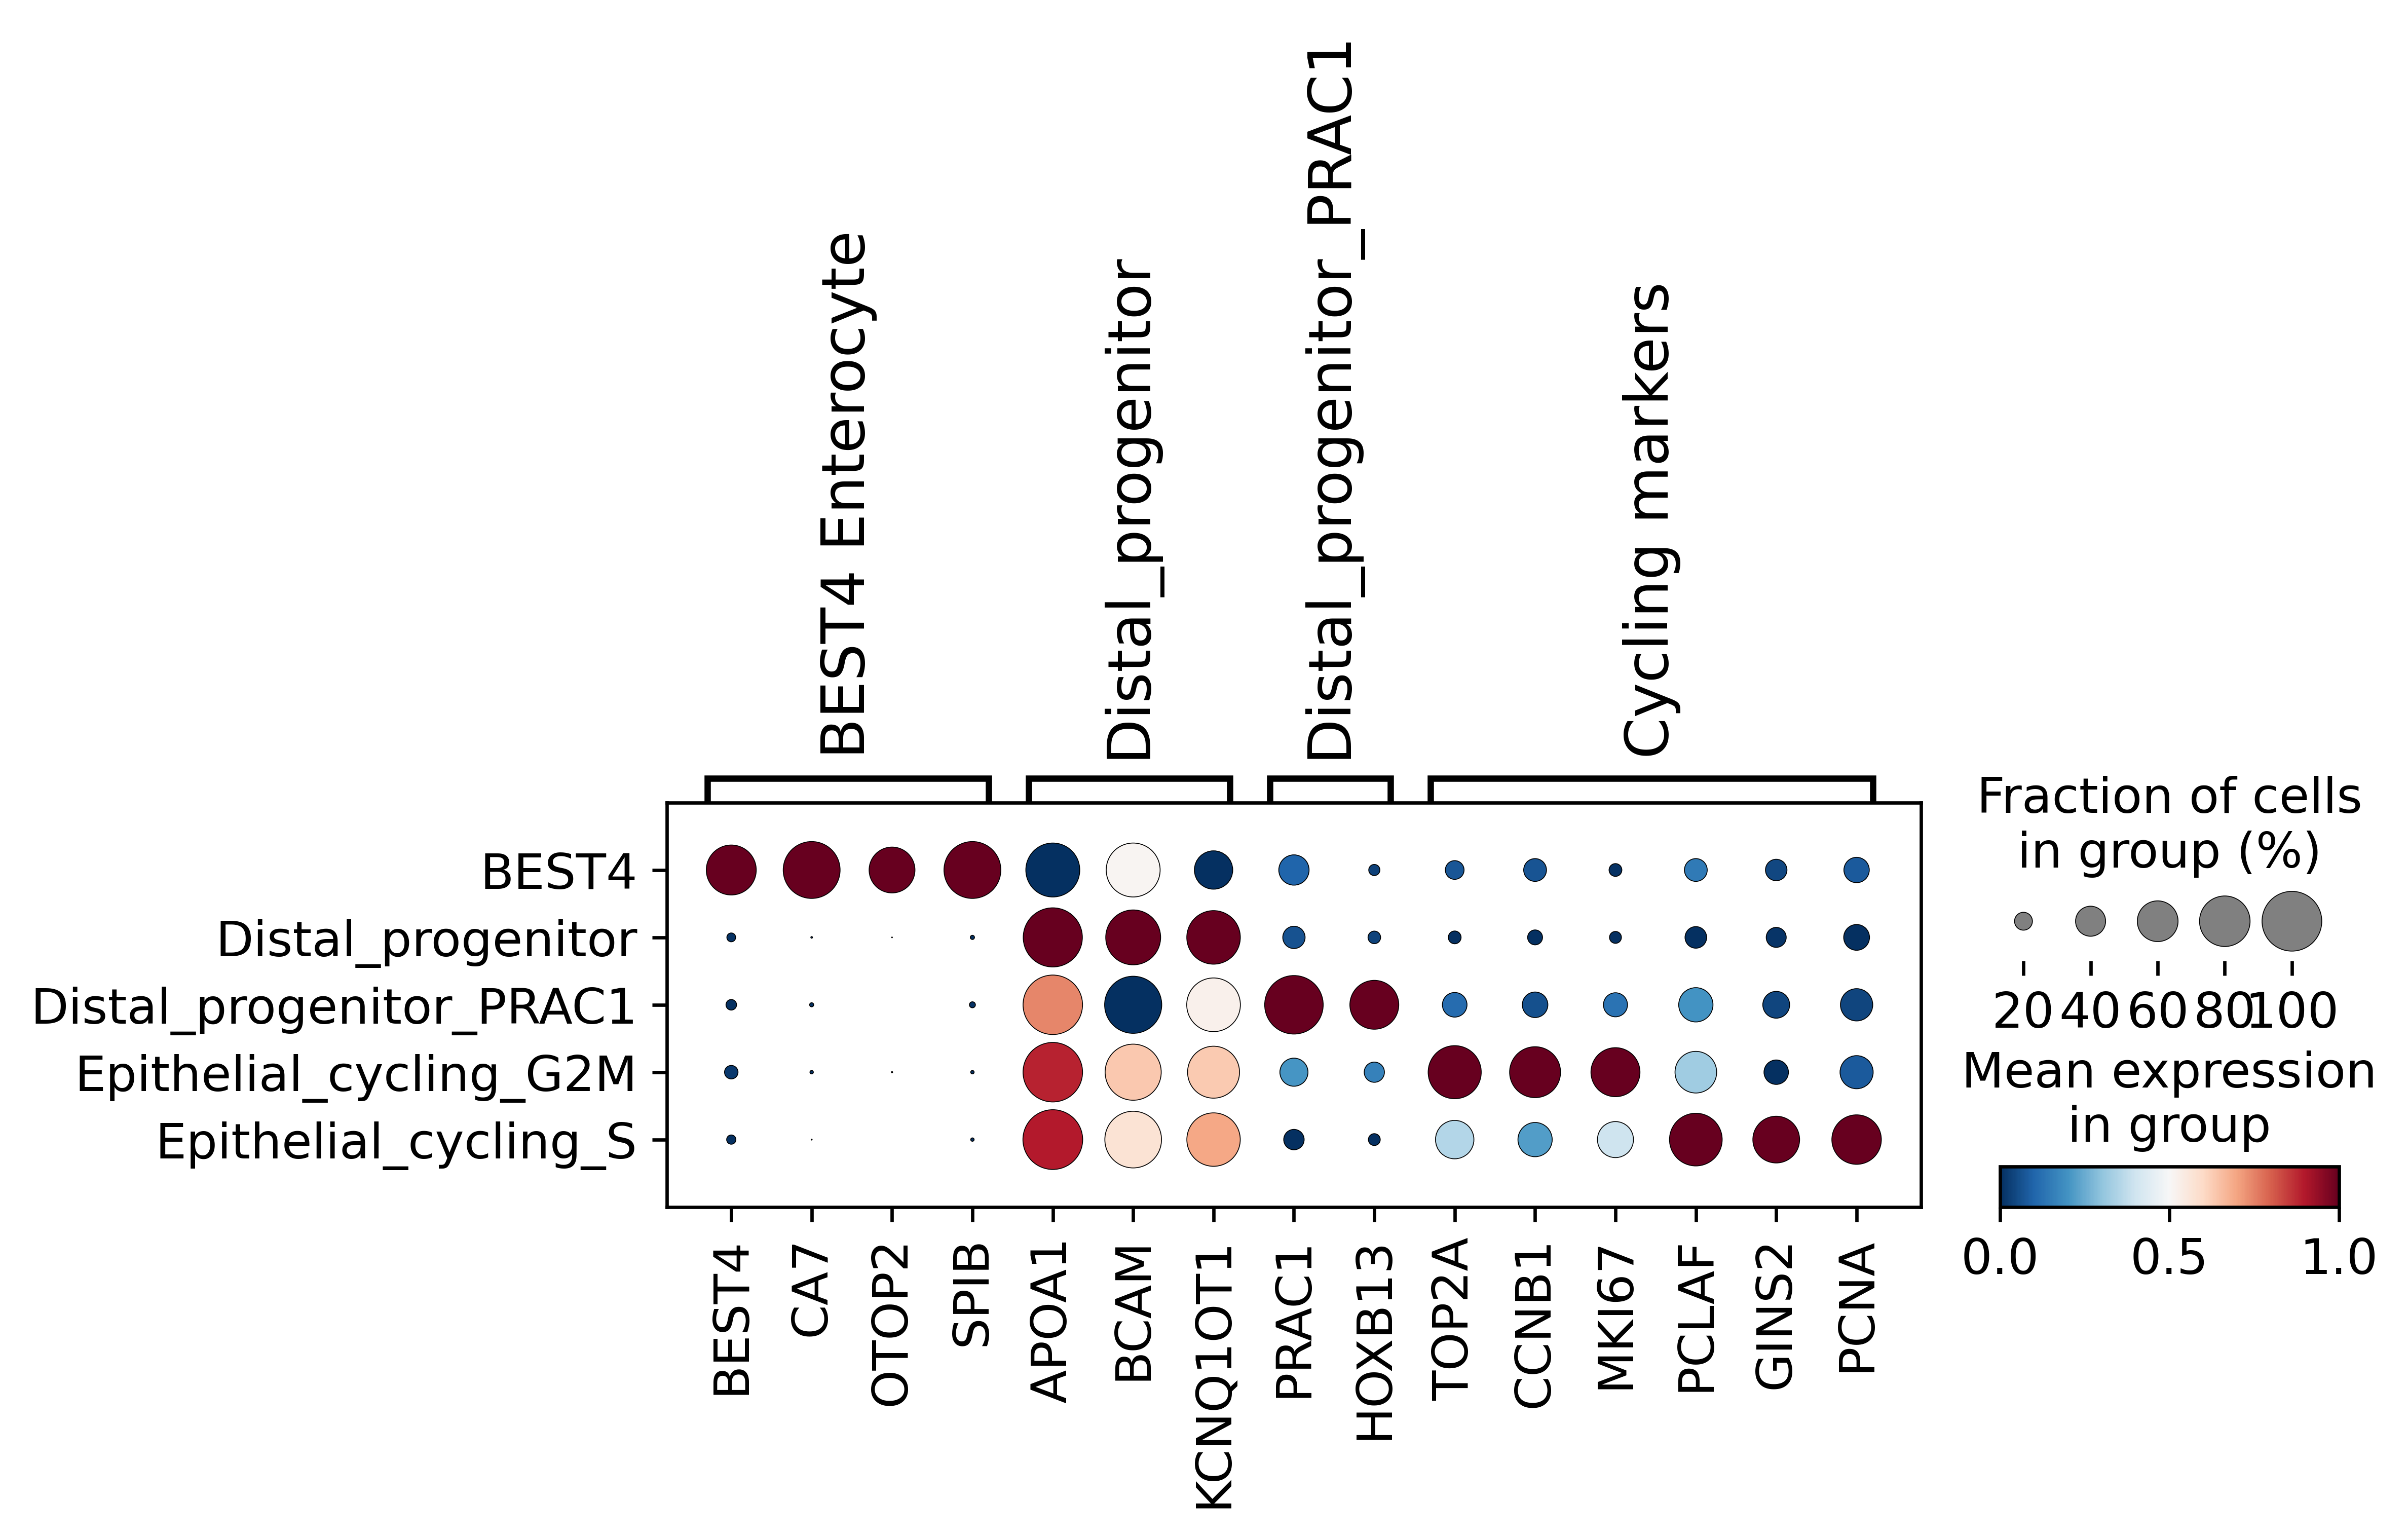

In [25]:
sc.pl.dotplot(adata,var_names=marker_genes_dict,groupby='fine_annot',save='Epi_LI_FT_markers.pdf',color_map='RdBu_r', standard_scale='var')

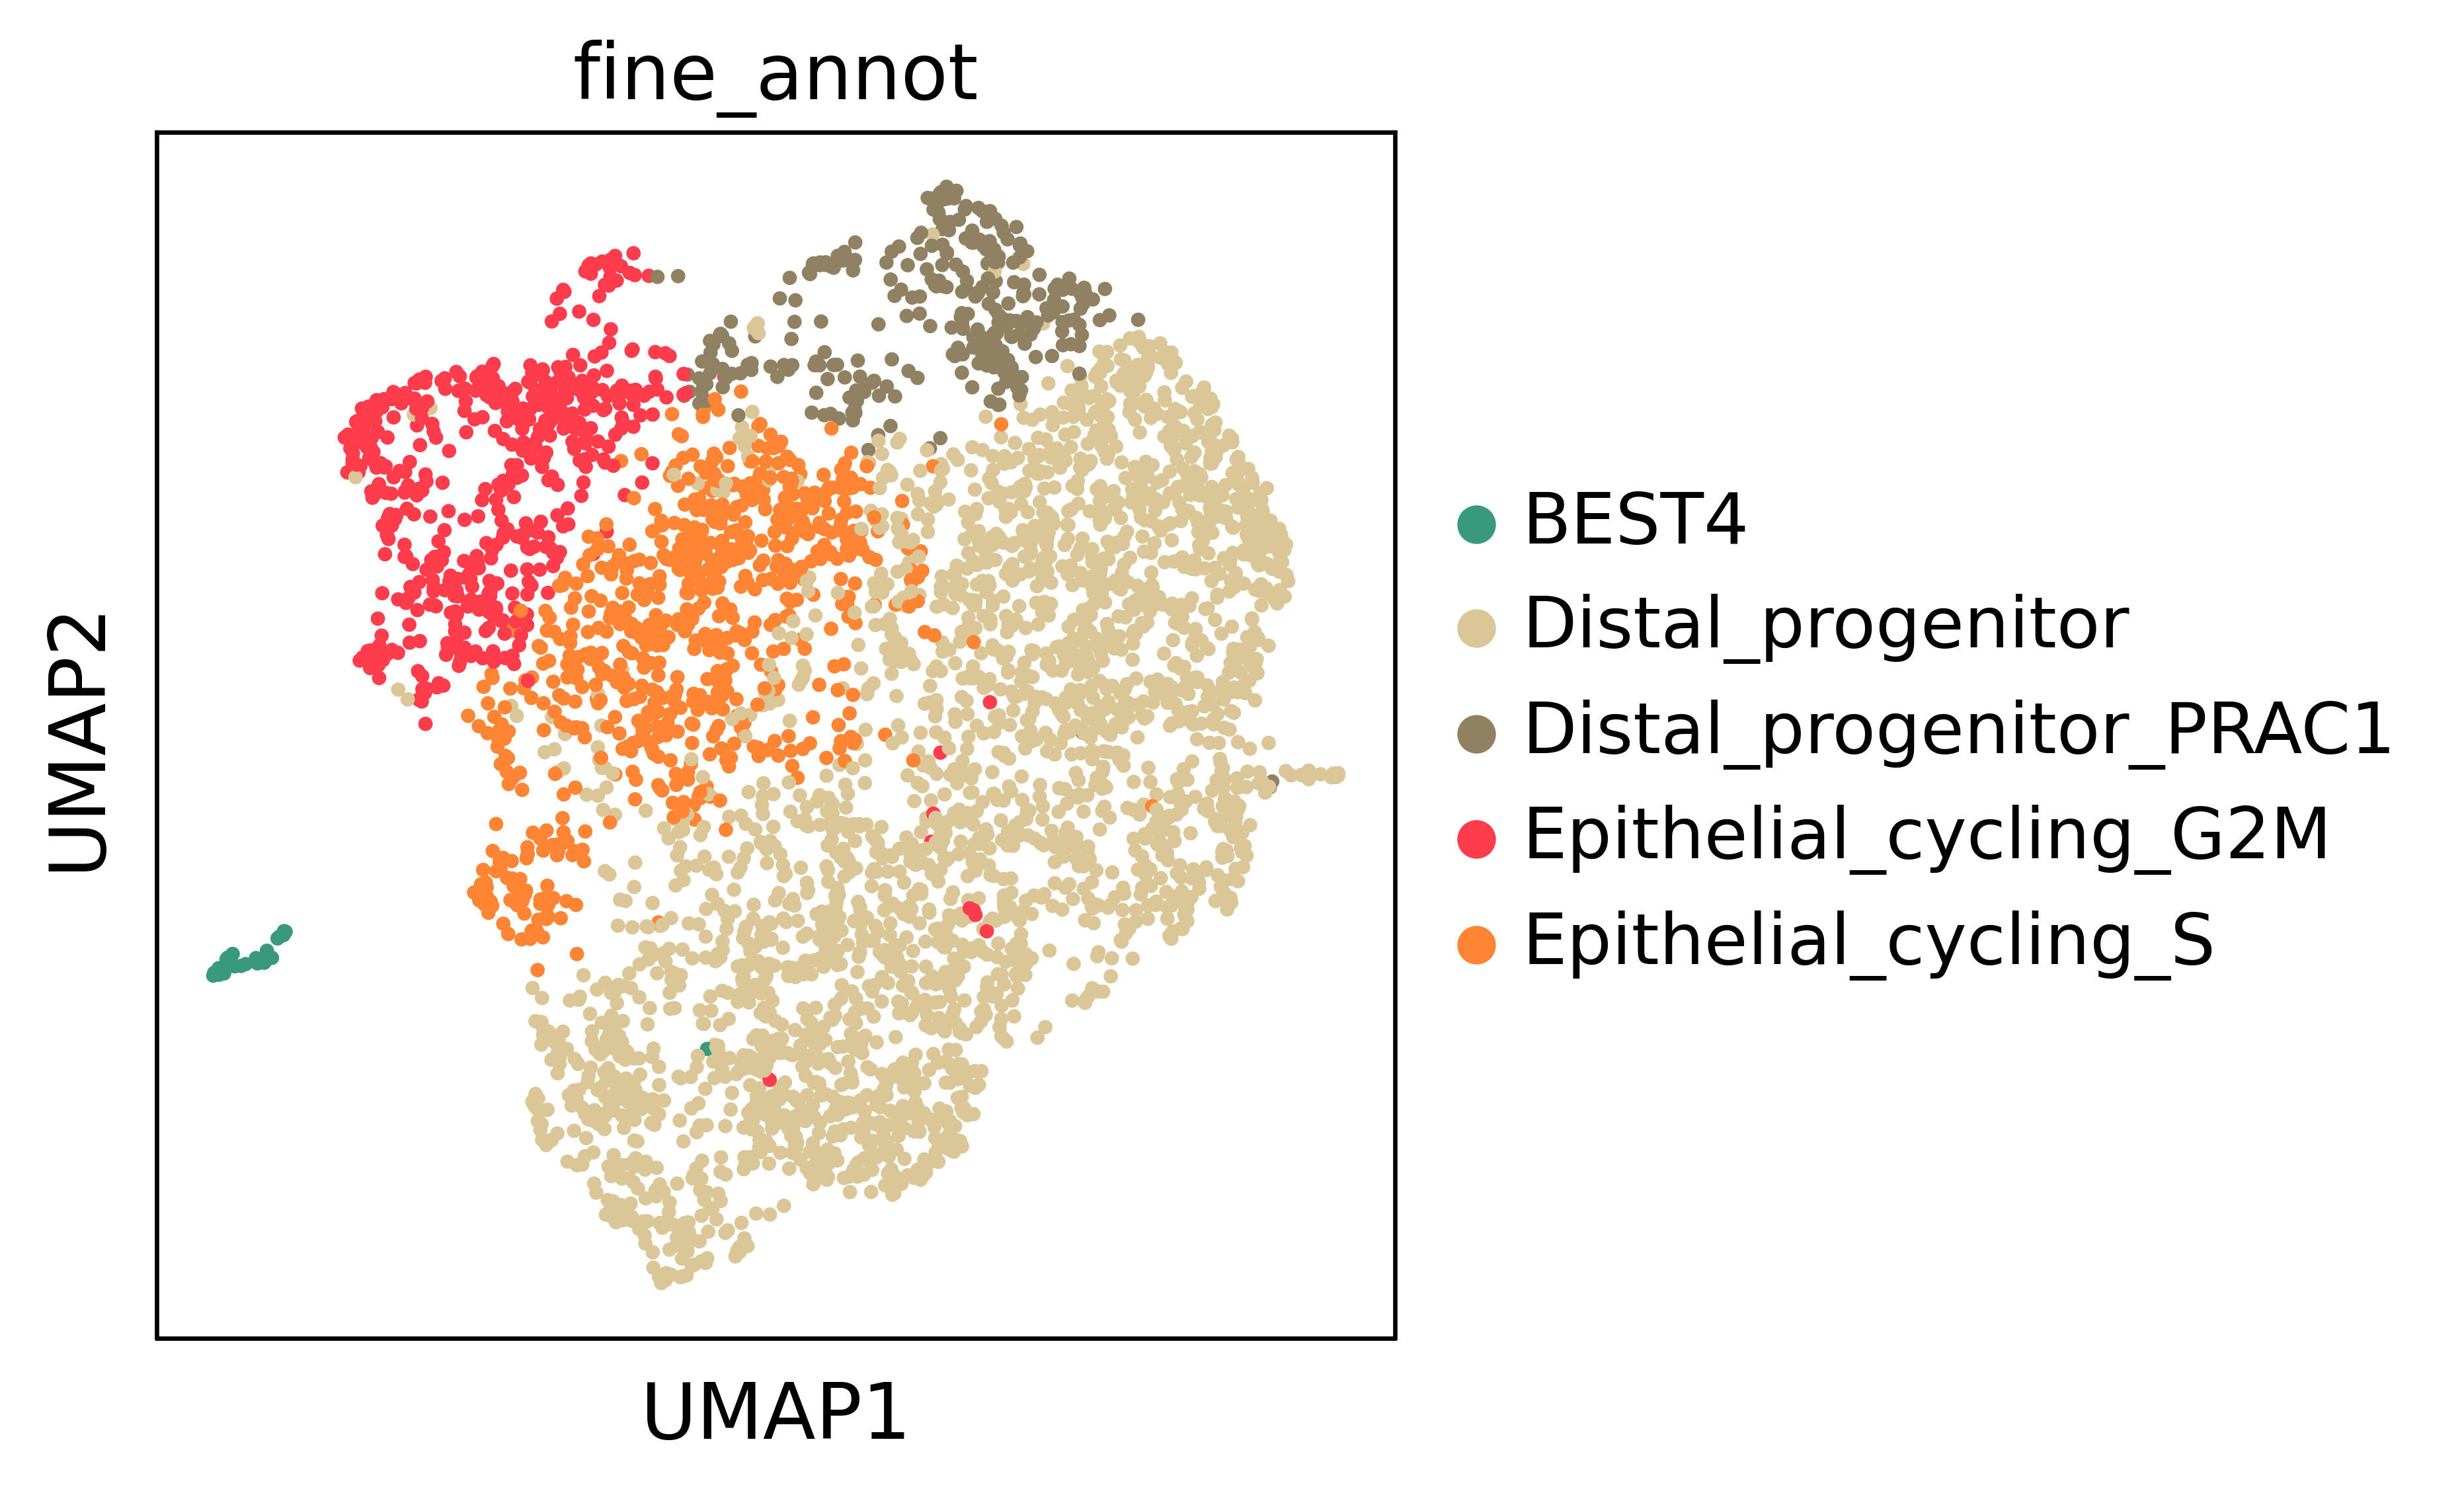

In [26]:
sc.pl.umap(adata,color='fine_annot',palette = ['#39997c',#BEST4
                                               '#dbc697',#'Distal_progenitor': 
                                                '#8f8161',#'Distal_progenitor_PRAC1':
                                              '#ff3c4b',#'Epithelial_cycling_G2M': 
                                             '#ff8433',# 'Epithelial_cycling_S': 
                                               
                                               
    
    
                                              ])

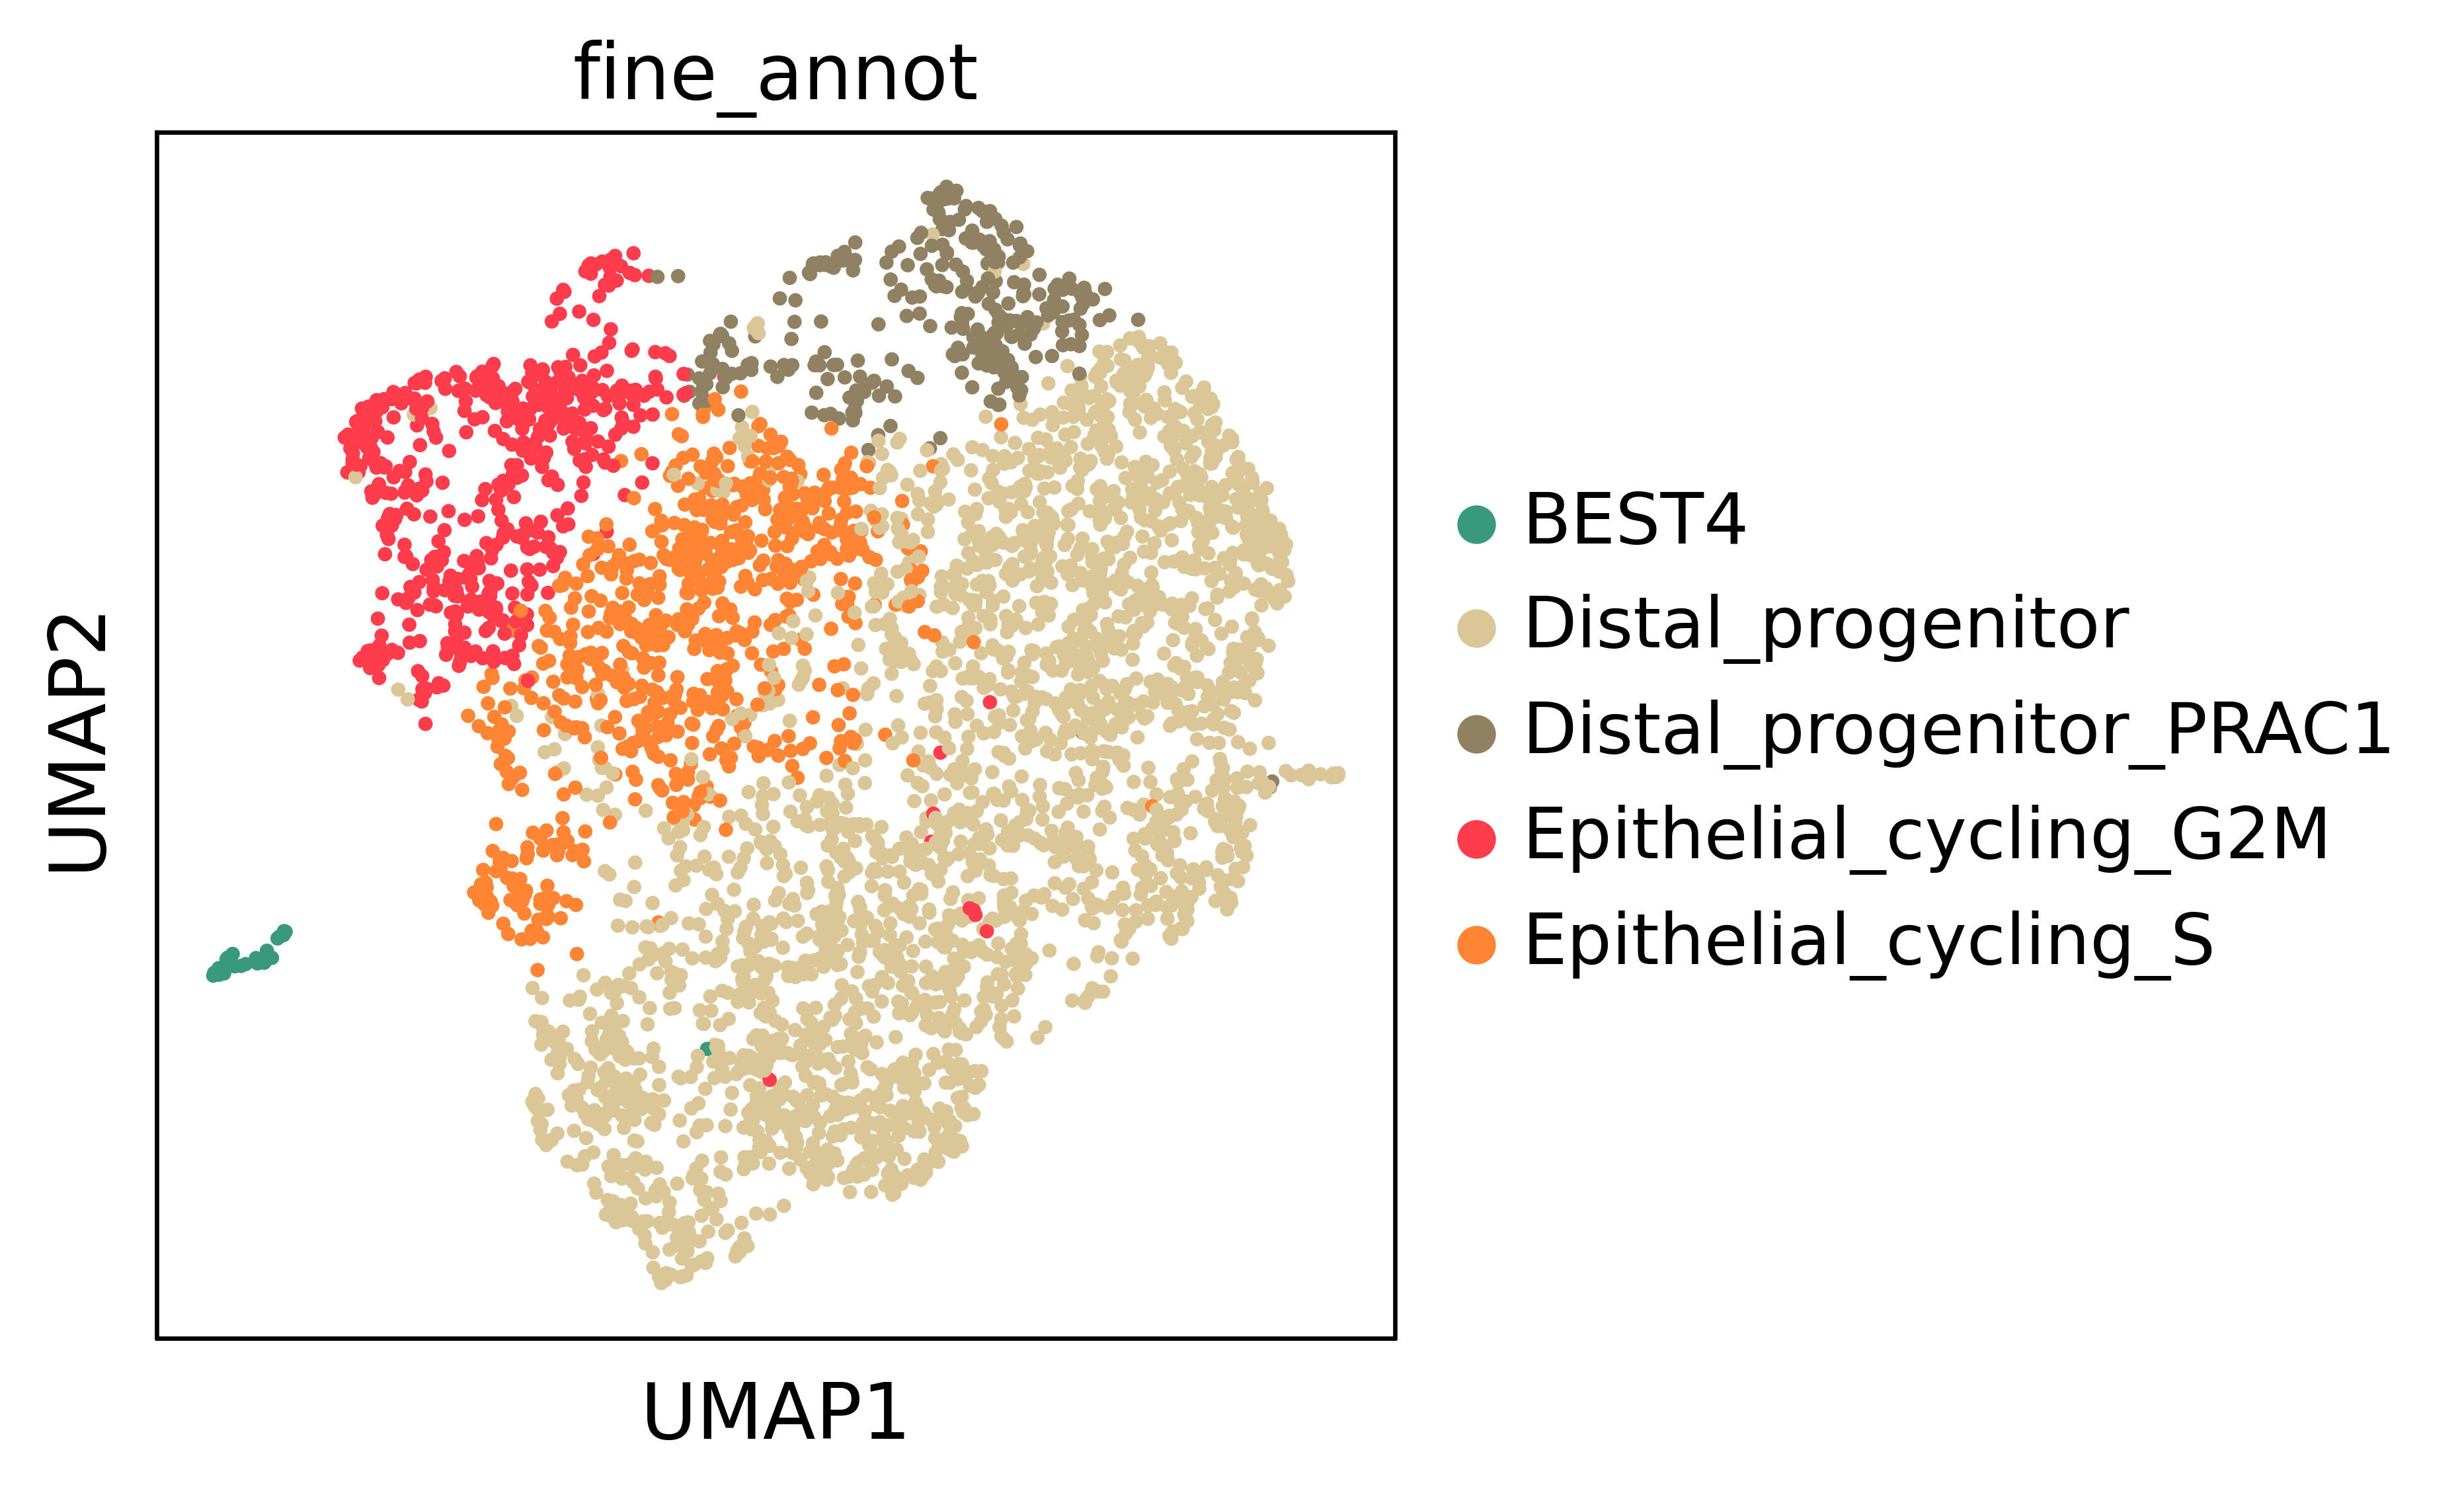

In [27]:
sc.pl.umap(adata,color='fine_annot',save='Epi_LI_FT_annot.png')

<AxesSubplot: title={'center': 'fine_annot'}, xlabel='UMAP1', ylabel='UMAP2'>

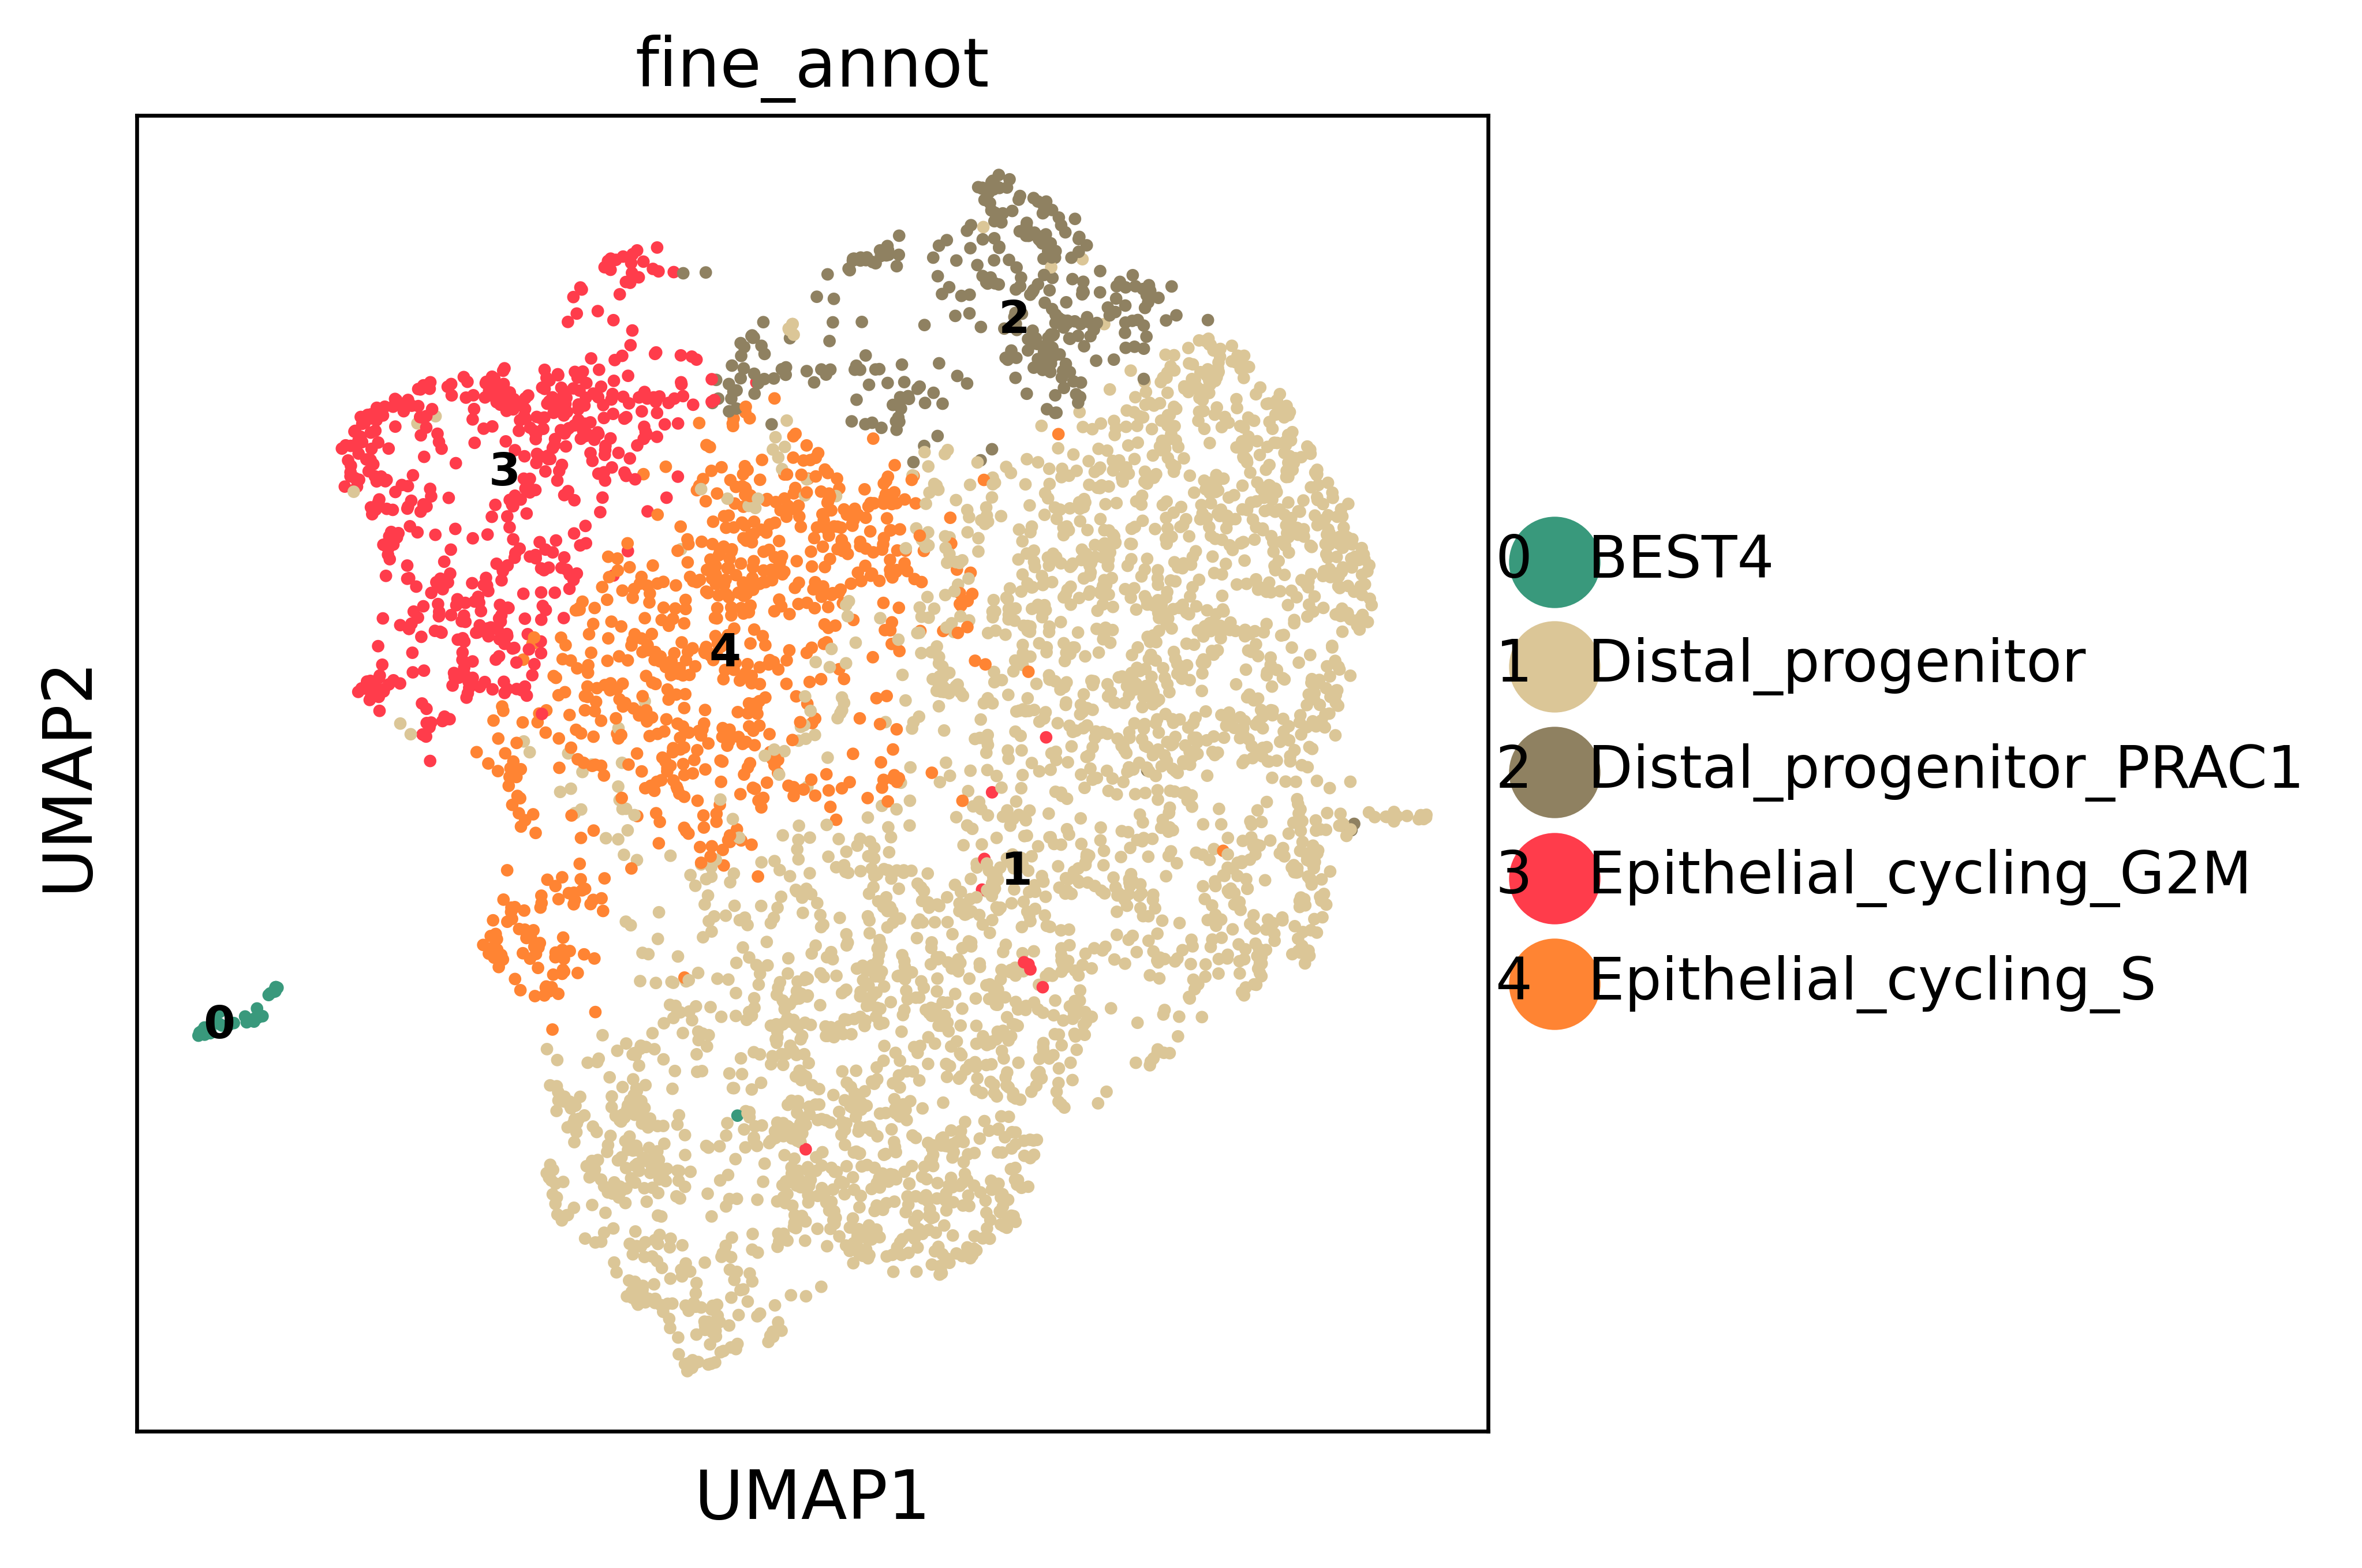

In [28]:
import sctk as sk
sk.plot_embedding(
    adata,
    basis="umap",
    groupby="fine_annot",
    figsize=(5, 5),
    save='figures/Epi_LI_FT_annot.png')